AUTOREGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.ar_model import AutoReg

In [2]:
df=pd.read_csv('DDFO.csv',delimiter=';')
df.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


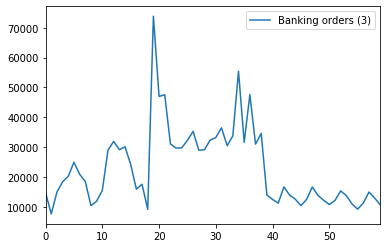

In [3]:
BO_3=df.filter(['Banking orders (3)'])
BO_3.plot()

In [4]:
def stationarityCheck(var):
    check = adfuller(var)
    print('ADF stat : %f' % check[0])
    print('p-value : %f' % check[1])
    print('Critical Values :')
    for key, val in check[4].items():
        print('%s : %.3f' % (key, val))

In [5]:
stationarityCheck(BO_3.values)

ADF stat : -2.519887
p-value : 0.110710
Critical Values :
1% : -3.548
5% : -2.913
10% : -2.594


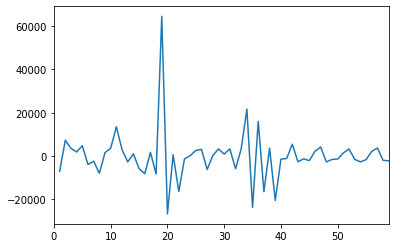

In [6]:
BO_3['FDiff']=BO_3['Banking orders (3)'].diff()
BO_3['FDiff'].plot()

In [7]:
BO_3.dropna(inplace=True)
stationarityCheck(BO_3['FDiff'].values)

ADF stat : -11.853972
p-value : 0.000000
Critical Values :
1% : -3.548
5% : -2.913
10% : -2.594


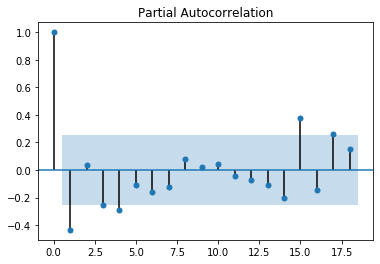

In [8]:
plot_pacf(BO_3['FDiff']);

In [9]:
period=10
X = BO_3['FDiff']
train = X[1:len(X)-period]
test = X[len(X)-period:]

In [10]:
model = AutoReg(X, lags=4)
model_fit = model.fit()
predictions = model_fit.predict(start=len(train)+1,end=len(train) + len(test),dynamic=False)
model_fit.summary()

C:\Users\m\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  FDiff   No. Observations:                   59
Model:                     AutoReg(4)   Log Likelihood                -585.297
Method:               Conditional MLE   S.D. of innovations          10125.633
Date:                Mon, 05 Apr 2021   AIC                             18.664
Time:                        14:03:02   BIC                             18.883
Sample:                             4   HQIC                            18.749
                                   59                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -224.1845   1365.484     -0.164      0.870   -2900.484    2452.115
FDiff.L1      -0.4671      0.130     -3.598      0.000      -0.722      -0.213
FDiff.L2      -0.0709      0.136     -0.521      0.602      -0.337       0.196
FDiff.L3      -0.3439      0.136     -2.534      0.011      -0.610      -0.078
FDiff.L4      -0.2684      0.129     -2.080      0.038      -0.521      -0.016
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6827           -1.1346j            1.3242           -0.1638
AR.2            0.6827           +1.1346j            1.3242            0.1638
AR.3           -1.3234           -0.6109j            1.4576           -0.4312
AR.4           -1.3234           +0.6109j            1.4576            0.4312
-----------------------------------------------------------------------------
"""

In [11]:
compare = pd.concat([predictions.rename('Diffrenced Predictions'),
                     BO_3['Banking orders (3)'].rename('Actual'),
                     BO_3['FDiff'].rename('First Difference')], axis=1)

In [12]:
compare['Predictions'] = compare['Diffrenced Predictions'] + compare['Actual'].shift(1)

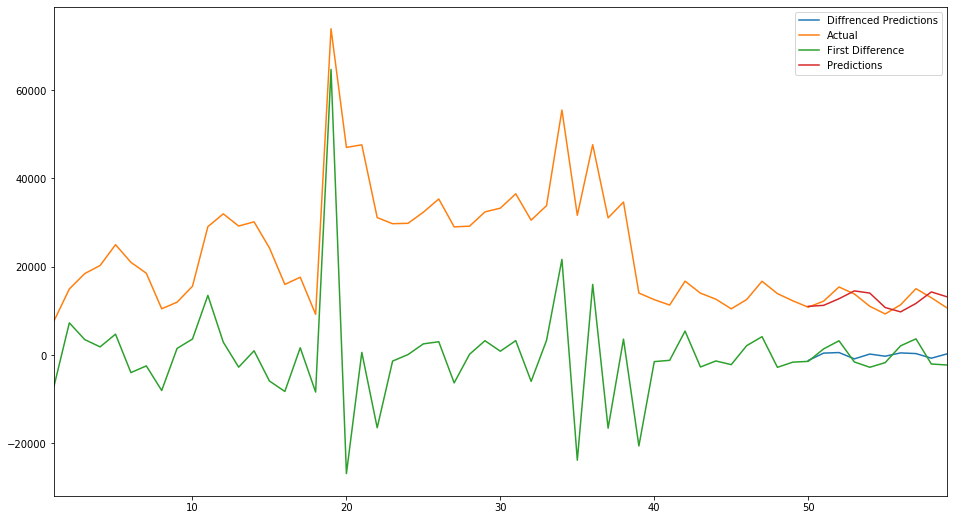

In [13]:
compare.plot(figsize=(16, 9))

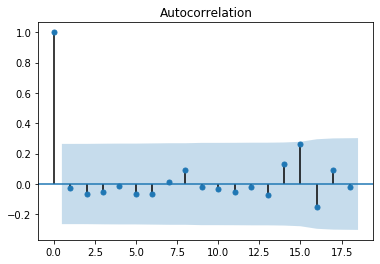

In [14]:
plot_acf(model_fit.resid);

------------------------------------------

Different lags | RMSE | Ljung–Box test on residuals

------------------------------------------

In [15]:
df=pd.read_csv('sales.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [16]:
df["date"]=pd.to_datetime(df["date"], format="%Y-%m-%d")
df.set_index("date", inplace=True)

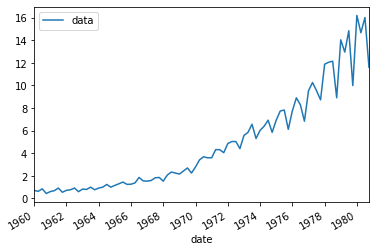

In [17]:
df.plot()

In [18]:
df['LDiff']=(np.log(df['data'])).diff()

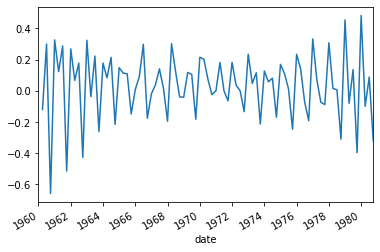

In [19]:
df['LDiff'].plot()

In [20]:
df.dropna(inplace=True)

In [21]:
stationarityCheck(df['LDiff'].values)

ADF stat : -4.317044
p-value : 0.000415
Critical Values :
1% : -3.518
5% : -2.900
10% : -2.587


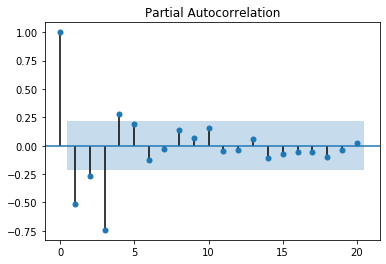

In [22]:
plot_pacf(df['LDiff']);

In [23]:
period=12
X = df['LDiff']
train = X[1:len(X)-period]
test = X[len(X)-period:]

In [24]:
model = AutoReg(X, lags=4)
model_fit = model.fit()
predictions = model_fit.predict(start=len(train)+1,end=len(train) + len(test),dynamic=False)
model_fit.summary()

C:\Users\m\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  LDiff   No. Observations:                   83
Model:                     AutoReg(4)   Log Likelihood                  87.331
Method:               Conditional MLE   S.D. of innovations              0.080
Date:                Mon, 05 Apr 2021   AIC                             -4.897
Time:                        14:03:09   BIC                             -4.717
Sample:                             4   HQIC                            -4.825
                                   83                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1105      0.018      6.312      0.000       0.076       0.145
LDiff.L1      -0.7180      0.104     -6.928      0.000      -0.921      -0.515
LDiff.L2      -0.6479      0.103     -6.280      0.000      -0.850      -0.446
LDiff.L3      -0.6077      0.104     -5.816      0.000      -0.812      -0.403
LDiff.L4       0.2337      0.098      2.384      0.017       0.042       0.426
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0388           -0.0000j            1.0388           -0.5000
AR.2           -0.0156           -1.0593j            1.0594           -0.2523
AR.3           -0.0156           +1.0593j            1.0594            0.2523
AR.4            3.6706           -0.0000j            3.6706           -0.0000
-----------------------------------------------------------------------------
"""

In [25]:
compare = pd.concat([predictions.rename('LDiffrenced Predictions'),
                     df['data'].rename('Actual'),
                     df['LDiff'].rename('Log Difference')], axis=1)

In [26]:
#compare['Predictions'] = (np.exp(compare['LDiffrenced Predictions']) + compare['Actual'].shift(1))
compare['Predictions'] = np.exp((compare['LDiffrenced Predictions'] + (np.log(compare['Actual'])).shift(1)))

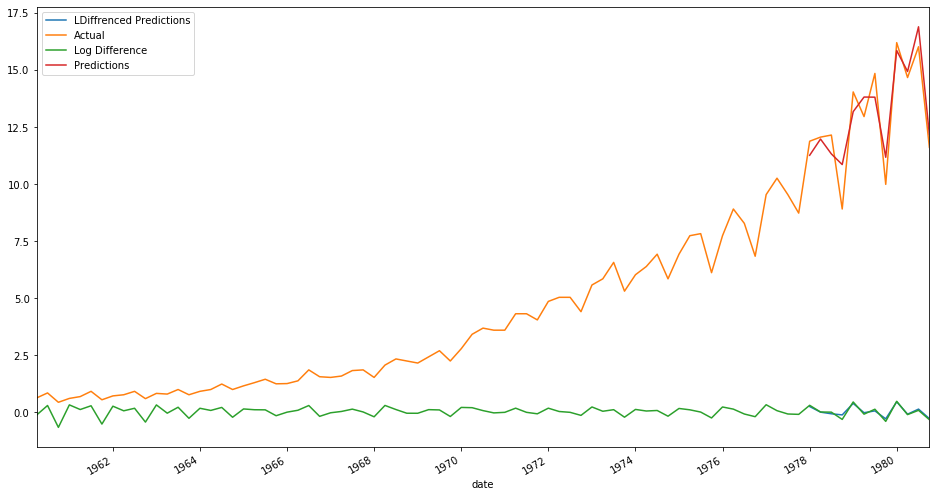

In [27]:
compare.plot(figsize=(16, 9))

In [28]:
rmse=((compare['Predictions']-compare['Actual'])**2).mean()**0.5
rmse

0.9172823128583492

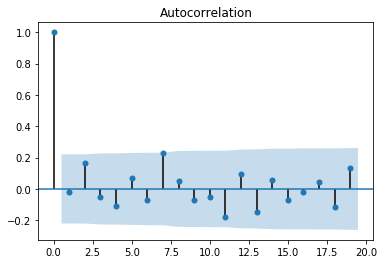

In [29]:
plot_acf(model_fit.resid);

------------------------------------------

Different difference | Different lags | Upper & Lower Bound | Ljung–Box test on residuals | Move forward

------------------------------------------